In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import seaborn as sns
import sys

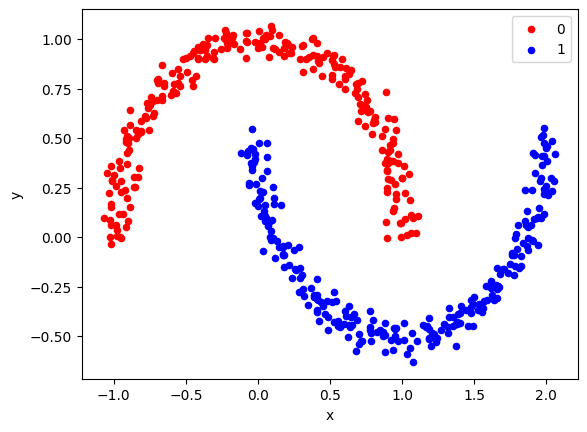

In [2]:
X, y = make_moons(n_samples=500, noise=0.05)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle=True)

df = pd.DataFrame(dict(x=X[:,0], y = X[:,1], label = y))

colors = {0: 'red', 1: 'blue'}
grouped = df.groupby('label')

fig, ax = plt.subplots()
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'x', y = 'y', label = key, color = colors[key])
plt.show()

In [3]:
import torch
from torch import nn
import torch.optim as optim

### Linear transformation

In [4]:
# Defining layers using torch's atomic operations
class CustomLinear(nn.Module):
    def __init__(self, _in, _out):
        super().__init__()
        
        self._in = _in
        self._out = _out
        
        # We want to implement the Linear transformation: Z = W * X + B
        
        # W: _in is the feature vector size (n). We need weights with shape (m x n), where m is number of neuron
        weight = torch.Tensor(_out, _in)
        self.weight = nn.Parameter(weight) # register weights as network parameters
        
        # B: Bias with shape (1 x m)
        bias = torch.Tensor(_out)
        self.bias = nn.Parameter(bias) # register bias as network parameters
        
        # Initialze weights (W) and biases (B)
        torch.nn.init.uniform_(self.weight, -1, 1)
        torch.nn.init.uniform_(self.bias, -1, 1)
        
    def __repr__(self):
        return f"CustomLinear(in_features={self._in}, out_features={self._out}, bias=VeryBiasedBehavior)"
    
    def forward(self, x: torch.tensor):
        z = torch.matmul(x, self.weight.t())
        z = torch.add(z, self.bias)
        return z 
    

In [ ]:
# NOTE: Future work: Apparently the Kaiming initialization is more stable

### Activation function

In [5]:
class CustomSigmoid(nn.Module):
    def __init__(self):
        super().__init__()
    
    def forward(self, x):
        return 1/ (1 + (torch.exp(-x)))

In [6]:
# Vanilla Neural Network with custom layers
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            CustomLinear(2,8),
            CustomSigmoid(),
            CustomLinear(8, 8),
            CustomSigmoid(),
            CustomLinear(8, 1),
            CustomSigmoid(),
        )

    def forward(self, x):
        logits = self.model(x)

        return logits

In [7]:
model = NeuralNetwork().to('cpu')
print(model)

NeuralNetwork(
  (model): Sequential(
    (0): CustomLinear(in_features=2, out_features=8, bias=VeryBiasedBehavior)
    (1): CustomSigmoid()
    (2): CustomLinear(in_features=8, out_features=8, bias=VeryBiasedBehavior)
    (3): CustomSigmoid()
    (4): CustomLinear(in_features=8, out_features=1, bias=VeryBiasedBehavior)
    (5): CustomSigmoid()
  )
)


In [8]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.9069, -0.3130],
         [-0.2223,  0.4752],
         [ 0.1505, -0.3861],
         [ 0.7325, -0.6369],
         [-0.6790, -0.1216],
         [ 0.9169,  0.7582],
         [ 0.7125,  0.2491],
         [-0.7915,  0.2390]], requires_grad=True),
 Parameter containing:
 tensor([ 0.4669, -0.1726,  0.2370,  0.5731,  0.3083, -0.8245, -0.4449, -0.8642],
        requires_grad=True),
 Parameter containing:
 tensor([[ 0.6998,  0.8686,  0.7251,  0.6679,  0.4628, -0.9361,  0.9688, -0.9693],
         [ 0.0514, -0.7406,  0.7794,  0.8253, -0.7928, -0.8719, -0.7201,  0.1957],
         [-0.4604,  0.6283, -0.0474, -0.6780,  0.3530, -0.2844, -0.4271,  0.0691],
         [-0.3539,  0.9632,  0.2868,  0.8023,  0.6081,  0.5658,  0.0214, -0.5968],
         [ 0.2861, -0.8662, -0.1737,  0.2102,  0.9898,  0.8622, -0.6059,  0.6354],
         [ 0.3076, -0.7036, -0.6225, -0.9626,  0.1191, -0.6174, -0.8281, -0.6743],
         [-0.3909,  0.7649, -0.3648,  0.9093, -0.3941,  0.5759,  0.4

In [9]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.2)

In [10]:
# Convert test data in numpy array to torch tensors
X_train_t = torch.tensor(X_train, dtype=torch.float32, requires_grad = True)
y_train_t = torch.tensor(y_train, dtype=torch.float32, requires_grad = True)

y_train_t = y_train_t.unsqueeze(1)

In [11]:
# Training loop
n_epochs = 150
for epoch in range(n_epochs):
    
    # Forward pass
    y_pred = model.forward(X_train_t)
    
    model.parameters()
    
    loss = criterion(y_pred, y_train_t)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    
    # Update weights
    optimizer.step()
    
    # Evaluation
    print(loss)

tensor(0.7497, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.8910, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6891, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6414, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6751, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6464, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.5820, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.5376, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.5244, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.5181, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.5008, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.4718, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.4402, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.4145, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3963, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3821, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3684, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3528, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.3356, grad_fn=<Bina

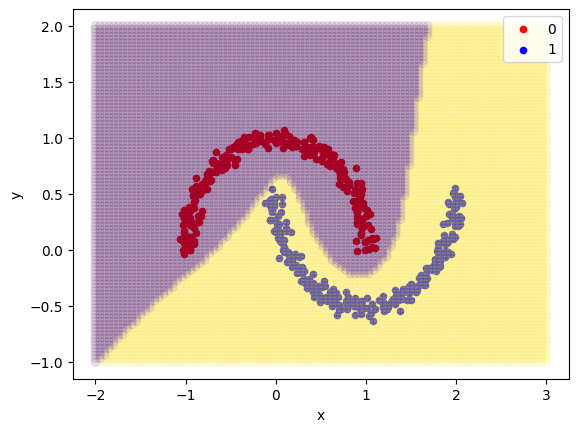

In [12]:
X, Y = np.mgrid[-2:3:100j,-1:2:100j]
X = X.flatten()
Y = Y.flatten()

# Visualize decision boundary 
colors = {0: 'red', 1: 'blue'}
grouped = df.groupby('label')

fig, ax = plt.subplots()
prediction = [1 if model.forward(torch.tensor([x,y], dtype=torch.float32)) > 0.8 else 0 for x, y in zip(X,Y)]
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'x', y = 'y', label = key, color = colors[key])

ax.scatter(X, Y, alpha = 0.1, c = prediction)
plt.show()
